# Description

https://www.kaggle.com/danerbland/electionfinance

# Data Source 
https://www.kaggle.com/danerbland/electionfinance/downloads/campaign-finance-versus-election-results.zip/1#CandidateSummaryAction1.csv

# Questions we asked
 
###### 1) Does election results depend on the expenditure made by candidates ?
###### 2) If there is a relation, does that relation hold true in large and smaller states alike? Or do they behave differently?
###### 3) If there is a relation, can we predict the election results based on this result ?

# Key Findings
#### 1) Highest spender in any electorate has very high chance of winning.
#### 2) Difference between the percentage of winners with highest expenditure was not statistically significant between large and small states
#### 3) It is possible to predict (with more than 90% accuracy) the result of election provided we know the expenditures made by each candidate

# Steps Involved
##### 1) Download data
##### 2) Clean Data
##### 3) Analyze data and Plot Graphs
##### 4) Perform statistical test
##### 5) Logistic Regression for prediction

In [1]:
# Import all the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
import scipy.stats as stats

%matplotlib inline

In [2]:
# Suppress the warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the raw data file
# Source: https://www.kaggle.com/danerbland/electionfinance/downloads/campaign-finance-versus-election-results.zip/1#CandidateSummaryAction1.csv
candidateSummaryAction = pd.read_csv('Resources/CandidateSummaryAction.csv')

# Clean the data set

In [4]:
# Clean the currency amount and change it to numeric

candidateSummaryAction['ind_ite_con'] = pd.to_numeric(candidateSummaryAction['ind_ite_con'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['ind_uni_con'] = pd.to_numeric(candidateSummaryAction['ind_uni_con'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['ind_con'] = pd.to_numeric(candidateSummaryAction['ind_con'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['par_com_con'] = pd.to_numeric(candidateSummaryAction['par_com_con'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['oth_com_con'] = pd.to_numeric(candidateSummaryAction['oth_com_con'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['can_con'] = pd.to_numeric(candidateSummaryAction['can_con'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['tot_con'] = pd.to_numeric(candidateSummaryAction['tot_con'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['tra_fro_oth_aut_com'] = pd.to_numeric(candidateSummaryAction['tra_fro_oth_aut_com'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['can_loa'] = pd.to_numeric(candidateSummaryAction['can_loa'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['oth_loa'] = pd.to_numeric(candidateSummaryAction['oth_loa'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['tot_loa'] = pd.to_numeric(candidateSummaryAction['tot_loa'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['off_to_ope_exp'] = pd.to_numeric(candidateSummaryAction['off_to_ope_exp'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['off_to_fun'] = pd.to_numeric(candidateSummaryAction['off_to_fun'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['off_to_leg_acc'] = pd.to_numeric(candidateSummaryAction['off_to_leg_acc'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['oth_rec'] = pd.to_numeric(candidateSummaryAction['oth_rec'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['tot_rec'] = pd.to_numeric(candidateSummaryAction['tot_rec'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['ope_exp'] = pd.to_numeric(candidateSummaryAction['ope_exp'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['exe_leg_acc_dis'] = pd.to_numeric(candidateSummaryAction['exe_leg_acc_dis'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['tra_to_oth_aut_com'] = pd.to_numeric(candidateSummaryAction['tra_to_oth_aut_com'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['can_loa_rep'] = pd.to_numeric(candidateSummaryAction['can_loa_rep'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['tot_loa_rep'] = pd.to_numeric(candidateSummaryAction['tot_loa_rep'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['ind_ref'] = pd.to_numeric(candidateSummaryAction['ind_ref'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['par_com_ref'] = pd.to_numeric(candidateSummaryAction['par_com_ref'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['oth_com_ref'] = pd.to_numeric(candidateSummaryAction['oth_com_ref'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['tot_con_ref'] = pd.to_numeric(candidateSummaryAction['tot_con_ref'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['oth_dis'] = pd.to_numeric(candidateSummaryAction['oth_dis'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['tot_dis'] = pd.to_numeric(candidateSummaryAction['tot_dis'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['cas_on_han_beg_of_per'] = pd.to_numeric(candidateSummaryAction['cas_on_han_beg_of_per'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['cas_on_han_clo_of_per'] = pd.to_numeric(candidateSummaryAction['cas_on_han_clo_of_per'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['net_con'] = pd.to_numeric(candidateSummaryAction['net_con'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['net_ope_exp'] = pd.to_numeric(candidateSummaryAction['net_ope_exp'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['deb_owe_by_com'] = pd.to_numeric(candidateSummaryAction['deb_owe_by_com'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))
candidateSummaryAction['deb_owe_to_com'] = pd.to_numeric(candidateSummaryAction['deb_owe_to_com'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")",""))


In [5]:
# Fill the blank numeric values with zero

candidateSummaryAction['ind_ite_con'].fillna(0, inplace = True)
candidateSummaryAction['ind_uni_con'].fillna(0, inplace = True)
candidateSummaryAction['ind_con'].fillna(0, inplace = True)
candidateSummaryAction['par_com_con'].fillna(0, inplace = True)
candidateSummaryAction['oth_com_con'].fillna(0, inplace = True)
candidateSummaryAction['can_con'].fillna(0, inplace = True)
candidateSummaryAction['tot_con'].fillna(0, inplace = True)
candidateSummaryAction['tra_fro_oth_aut_com'].fillna(0, inplace = True)
candidateSummaryAction['can_loa'].fillna(0, inplace = True)
candidateSummaryAction['oth_loa'].fillna(0, inplace = True)
candidateSummaryAction['tot_loa'].fillna(0, inplace = True)
candidateSummaryAction['off_to_ope_exp'].fillna(0, inplace = True)
candidateSummaryAction['off_to_fun'].fillna(0, inplace = True)
candidateSummaryAction['off_to_leg_acc'].fillna(0, inplace = True)
candidateSummaryAction['oth_rec'].fillna(0, inplace = True)
candidateSummaryAction['tot_rec'].fillna(0, inplace = True)
candidateSummaryAction['ope_exp'].fillna(0, inplace = True)
candidateSummaryAction['exe_leg_acc_dis'].fillna(0, inplace = True)
candidateSummaryAction['tra_to_oth_aut_com'].fillna(0, inplace = True)
candidateSummaryAction['can_loa_rep'].fillna(0, inplace = True)
candidateSummaryAction['tot_loa_rep'].fillna(0, inplace = True)
candidateSummaryAction['ind_ref'].fillna(0, inplace = True)
candidateSummaryAction['par_com_ref'].fillna(0, inplace = True)
candidateSummaryAction['oth_com_ref'].fillna(0, inplace = True)
candidateSummaryAction['tot_con_ref'].fillna(0, inplace = True)
candidateSummaryAction['oth_dis'].fillna(0, inplace = True)
candidateSummaryAction['tot_dis'].fillna(0, inplace = True)
candidateSummaryAction['cas_on_han_beg_of_per'].fillna(0, inplace = True)
candidateSummaryAction['cas_on_han_clo_of_per'].fillna(0, inplace = True)
candidateSummaryAction['net_con'].fillna(0, inplace = True)
candidateSummaryAction['ind_uni_con'].fillna(0, inplace = True)
candidateSummaryAction['net_ope_exp'].fillna(0, inplace = True)
candidateSummaryAction['deb_owe_by_com'].fillna(0, inplace = True)
candidateSummaryAction['deb_owe_to_com'].fillna(0, inplace = True)

In [6]:
# Rename the data columns

candidateSummaryAction.rename(columns = {'can_id':'Candidate Id',
                                         'can_nam':'Candidate Name',
                                         'can_off':'Candidate Office',
                                         'can_off_sta':'Candidate Office State',
                                         'can_off_dis':'Candidate Office District',
                                         'can_par_aff':'Candidate Party Affiliation',
                                         'can_inc_cha_ope_sea':'Candidate Incumbent Challenger Open Seat',
                                         'can_str1':'Candidate Street 1',
                                         'can_str2':'Candidate Street 2',
                                         'can_cit':'Candidate City',
                                         'can_sta':'Candidate State',
                                         'can_zip':'Candidate Zip',
                                         'ind_ite_con':'Individual Itemized Contribution',
                                         'ind_uni_con':'Individual Unitemized Contribution',
                                         'ind_con':'Individual Contribution',
                                         'par_com_con':'Party Committee Contribution',
                                         'oth_com_con':'Other Committee Contribution',
                                         'can_con':'Candidate Contribution',
                                         'tot_con':'Total Contribution',
                                         'tra_fro_oth_aut_com':'Transfer from other Authorized Committee',
                                         'can_loa':'Candidate Loan',
                                         'oth_loa':'Other Loan',
                                         'tot_loa':'Total Loan',
                                         'off_to_ope_exp':'Offsets to Operating Expenditure',
                                         'off_to_fun':'Offsets to Fundraising',
                                         'off_to_leg_acc':'Offsets to Legal Accounting',
                                         'oth_rec':'Other Receipts',
                                         'tot_rec':'Total Receipts',
                                         'ope_exp':'Operating Expenditure',
                                         'exe_leg_acc_dis':'Exempt Legal Accounting Disbursement',
                                         'fun_dis':'Fundraising Disbursement',
                                         'tra_to_oth_aut_com':'Transfer to Other Authorized Committee',
                                         'can_loa_rep':'Candidate Loan Repayment',
                                         'oth_loa_rep':'Other Loan Repayment',
                                         'tot_loa_rep':'Total Loan Repayment',
                                         'ind_ref':'Individual Refund',
                                         'par_com_ref':'Party Committee Refund',
                                         'oth_com_ref':'Other Committee Refund',
                                         'tot_con_ref':'Total Contribution Refund',
                                         'oth_dis':'Other Disbursement',
                                         'tot_dis':'Total Disbursement',
                                         'cas_on_han_beg_of_per':'Cash on Hand Beginning of Period',
                                         'cas_on_han_clo_of_per':'Cash on Hand Close of Period',
                                         'net_con':'Net Contribution',
                                         'net_ope_exp':'Net Operating Expenditure',
                                         'deb_owe_by_com':'Debt Owed by Committee',
                                         'deb_owe_to_com':'Debt Owed to Committee',
                                         'cov_sta_dat':'Coverage Start Date',
                                         'cov_end_dat':'Coverage End Date',
                                         'winner':'Winner',
                                         'votes':'Votes'
    
},inplace = True)

# Create a new field Winner_binary which is either 1 or 0
candidateSummaryAction['Winner_binary'] = np.where(candidateSummaryAction['Winner']=='Y',1,0)
candidateSummaryAction.head(2)


,Candidate Id,Candidate Name,Candidate Office,Candidate Office State,Candidate Office District,Candidate Party Affiliation,Candidate Incumbent Challenger Open Seat,Candidate Street 1,Candidate Street 2,Candidate City,...,Cash on Hand Close of Period,Net Contribution,Net Operating Expenditure,Debt Owed by Committee,Debt Owed to Committee,Coverage Start Date,Coverage End Date,Winner,Votes,Winner_binary
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,2237 PICKENS RD,NaN,AUGUSTA,...,175613.35,1074949.50,907156.21,1125000.0,0.0,1/1/2015,10/19/2016,Y,158708.0,1
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PO BOX 6578,NaN,PHILADELPHIA,...,105687.23,1406719.06,1298831.83,0.0,0.0,11/2/2015,10/19/2016,Y,310770.0,1


In [7]:
# Subset the dataset to select interested columns
candidateSummary = candidateSummaryAction[['Candidate Id','Candidate Name', 'Candidate Office',
       'Candidate Office State', 'Candidate Office District','Candidate Party Affiliation',
       'Candidate Incumbent Challenger Open Seat','Net Contribution', 'Net Operating Expenditure',
       'Winner_binary','Cash on Hand Beginning of Period','Cash on Hand Close of Period','Individual Itemized Contribution',
        'Individual Unitemized Contribution','Individual Contribution','Party Committee Contribution']]
candidateSummary.head(2)

,Candidate Id,Candidate Name,Candidate Office,Candidate Office State,Candidate Office District,Candidate Party Affiliation,Candidate Incumbent Challenger Open Seat,Net Contribution,Net Operating Expenditure,Winner_binary,Cash on Hand Beginning of Period,Cash on Hand Close of Period,Individual Itemized Contribution,Individual Unitemized Contribution,Individual Contribution,Party Committee Contribution
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,1074949.50,907156.21,1,60109.57,175613.35,554305.00,46969.50,601274.50,0.0
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,1406719.06,1298831.83,1,0.00,105687.23,1042280.38,72430.64,1114711.02,0.0


# Separate the study for three different types of Election - 'House of Representatives', 'Senate' and 'President'

In [8]:
# Split the dataset into House, Senate and Presidential elections

candidateHouse = candidateSummary[candidateSummary['Candidate Office']=='H']
candidateSenate = candidateSummary[candidateSummary['Candidate Office']=='S']
candidatePresident = candidateSummary[candidateSummary['Candidate Office']=='P']

# Analysis on the Election for House of Representatives

### .1st Hypothesis is election results will be influenced by the amount of expenditures one makes
### . Another thing to consider is that whether candidates getting large amount of unitemized contribution end up winning. Assumption is popular candidates will receive more unitemized contributions

### . Each electorate will require different amount of expenditure. Ex: In smaller states with lower population, spending small amount of money may win you an election while in larger states with higher population, more expenditure would be required
### . Thus a ranking order will have to be created for each electorate

In [9]:
# Create a field to uniquely identify an Electorate. Combination of State and District
candidateHouse['Electorate'] = candidateHouse['Candidate Office State'] + '-' + candidateHouse['Candidate Office District'].astype(str)

# Take only the cases where 'Net Operating Expenditure' is greater than 0 so that it does not impact the ranking
candidateHouse = candidateHouse[candidateSummary['Net Operating Expenditure'] > 0]

In [10]:
# Get the ranks of candidates by netExpenditure, UnItemizedContribution and ItemizedContribution
candidateHouse['rank_netExpenditure'] = candidateHouse.groupby(['Candidate Office State','Candidate Office District'])['Net Operating Expenditure'].rank(ascending = False)
candidateHouse['rank_UnItemizedContribution'] = candidateHouse.groupby(['Candidate Office State','Candidate Office District'])['Individual Unitemized Contribution'].rank(ascending = False)
candidateHouse['rank_ItemizedContribution'] = candidateHouse.groupby(['Candidate Office State','Candidate Office District'])['Individual Itemized Contribution'].rank(ascending = False)
candidateHouse['rank_IndividualContribution'] = candidateHouse.groupby(['Candidate Office State','Candidate Office District'])['Individual Contribution'].rank(ascending = False)
candidateHouse['rank_PartyContribution'] = candidateHouse.groupby(['Candidate Office State','Candidate Office District'])['Party Committee Contribution'].rank(ascending = False)

In [11]:
# Take only the cases where rank could be created
candidateHouse = candidateHouse.loc[candidateHouse['rank_netExpenditure'].isnull()==False,:]
candidateHouse.sort_values(['Candidate Office State','Candidate Office District','rank_netExpenditure'],inplace = True)


# Analyze data and plot the graphs

#### Winning vs. Being highest spender

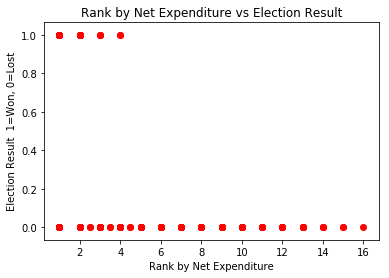

In [12]:
plt.scatter(candidateHouse['rank_netExpenditure'], candidateHouse['Winner_binary'],color='red')
plt.title('Rank by Net Expenditure vs Election Result')
plt.xlabel('Rank by Net Expenditure')
plt.ylabel('Election Result  1=Won, 0=Lost')
plt.show()


##### Notice the peakedness of the graph. Candidates who are ranked 1 in net expenditure in their respective electorates end up winning the election

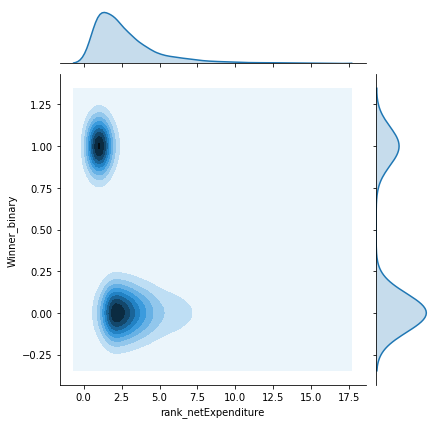

In [13]:
sns.jointplot(x= candidateHouse['rank_netExpenditure'], y = candidateHouse['Winner_binary'], data = candidateHouse, kind = 'kde')
plt.show()

In [14]:
# Show the same thing above in the table
rank_netExpenditure_Summary = candidateHouse.groupby(['rank_netExpenditure'])['Winner_binary'].agg(['sum'])
rank_netExpenditure_Summary

,sum
rank_netExpenditure,
1.0,401
2.0,29
2.5,0
3.0,3
3.5,0
4.0,2
4.5,0
5.0,0
6.0,0


#### Winning vs. Party's backing

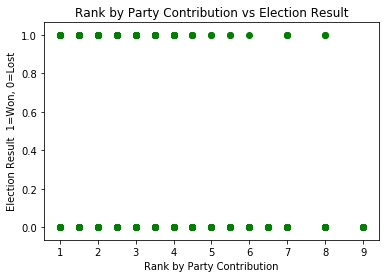

In [15]:
plt.scatter(candidateHouse['rank_PartyContribution'],candidateHouse['Winner_binary'],color='green')
plt.title('Rank by Party Contribution vs Election Result')
plt.xlabel('Rank by Party Contribution')
plt.ylabel('Election Result  1=Won, 0=Lost')
plt.show()

#####  Notice the peakedness of the graph. Candidates who are ranked 1 in Party Contribution does not necessarily end up winning the election

#####  This may mean the party pumps in money where the candiate is not really the first choice of people

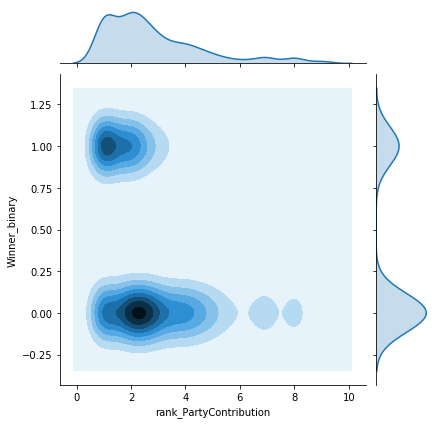

In [16]:
sns.jointplot(x= candidateHouse['rank_PartyContribution'], y = candidateHouse['Winner_binary'], data = candidateHouse, kind = 'kde')
plt.show()

In [17]:
# Show the same thing above in the table
rank_PartyContribution_Summary = candidateHouse.groupby(['rank_PartyContribution'])['Winner_binary'].agg(['sum'])
rank_PartyContribution_Summary

,sum
rank_PartyContribution,
1.0,163
1.5,66
2.0,100
2.5,47
3.0,25
3.5,11
4.0,9
4.5,4
5.0,2


#### Winning vs. Individual Contributions

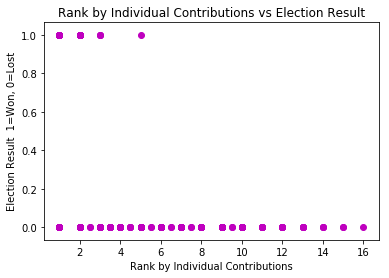

In [40]:
plt.scatter(candidateHouse['rank_IndividualContribution'],candidateHouse['Winner_binary'], color='m')
plt.title('Rank by Individual Contributions vs Election Result')
plt.xlabel('Rank by Individual Contributions')
plt.ylabel('Election Result  1=Won, 0=Lost')
plt.show()

#####  Notice the peakedness of the graph. Candidates who are ranked 1 in Individual Contribution in their respective electorates end up winning the election

##### Candidates who are popular amongst the mass (so more individual contributions) have higher changes of winning

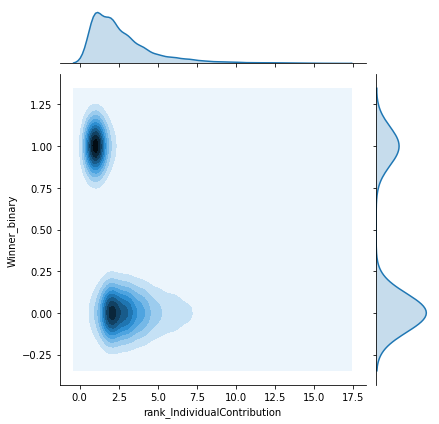

In [19]:
sns.jointplot(x= candidateHouse['rank_IndividualContribution'], y = candidateHouse['Winner_binary'], data = candidateHouse, kind = 'kde')
plt.show()

In [20]:
# Show the same thing above in the table
rank_IndividualContribution_Summary = candidateHouse.groupby(['rank_IndividualContribution'])['Winner_binary'].agg(['sum'])
rank_IndividualContribution_Summary

,sum
rank_IndividualContribution,
1.0,393
2.0,38
2.5,0
3.0,3
3.5,0
4.0,0
4.5,0
5.0,1
5.5,0


## OBSERVATIONS:
#### 1.Net expenditure has high impact in determining the result
#### 2. Individual contribution has high impact in determining the result
#### 3. Party contributions doesn't seem to have high impact in determining the result

# Study to see to if large states behave diffrently than small States

In [21]:
# Get unique number of electorates for each state
summaryByState_1 = candidateHouse.groupby(['Candidate Office State'])['Candidate Office District'].agg({"Num_of_Electorates": lambda x: x.nunique()})

# Subset only the electorates with highest Spenders
summaryByState_temp = candidateHouse.loc[candidateHouse['rank_netExpenditure'] ==1]

# Count the number of electorates won by highest spenders in each state
summaryByState_2 = summaryByState_temp.groupby(['Candidate Office State'])['Winner_binary'].agg({"Num_of_Rank_1_Winners": np.sum})

# Merge the two data set
summaryByState = summaryByState_1.join(summaryByState_2)

# Calculate the percentage of electorates won by highest spenders in each state
summaryByState['Percent_Rank_1_Winners'] = round(summaryByState['Num_of_Rank_1_Winners']/summaryByState['Num_of_Electorates']*100,2)

# Put a marker to identify large and small states
summaryByState['Elec_Bucket'] = np.where(summaryByState['Num_of_Electorates'] >5,'Large','Small')

summaryByState

,Num_of_Electorates,Num_of_Rank_1_Winners,Percent_Rank_1_Winners,Elec_Bucket
Candidate Office State,,,,
AK,1.0,1,100.00,Small
AL,7.0,7,100.00,Large
AR,4.0,4,100.00,Small
AS,1.0,0,0.00,Small
AZ,9.0,8,88.89,Large
CA,53.0,52,98.11,Large
CO,7.0,7,100.00,Large
CT,5.0,5,100.00,Small
DC,1.0,1,100.00,Small


In [22]:
# Take only the small states
Small = summaryByState.loc[summaryByState['Elec_Bucket'] =='Small',:]
# Take only the large states
Large = Small = summaryByState.loc[summaryByState['Elec_Bucket'] =='Large',:]

# Take 20 random small states
small_random_sample = np.random.choice(Small['Percent_Rank_1_Winners'], 20)

# Take 20 random large states
large_random_sample = np.random.choice(Small['Percent_Rank_1_Winners'], 20)

# perform F test to see if they are different
stats.f_oneway(small_random_sample, large_random_sample)

F_onewayResult(statistic=1.3244740087061089, pvalue=0.25698118940676024)

### Conclusion: p value greater than .05, implying they are not statistically different

# Predictingthe House Representative Election based on the net expenditure

In [23]:
rank = pd.get_dummies(candidateHouse['rank_netExpenditure'],prefix = 'rank_expenditure')
rank.columns

Index(['rank_expenditure_1.0', 'rank_expenditure_2.0', 'rank_expenditure_2.5',
       'rank_expenditure_3.0', 'rank_expenditure_3.5', 'rank_expenditure_4.0',
       'rank_expenditure_4.5', 'rank_expenditure_5.0', 'rank_expenditure_6.0',
       'rank_expenditure_7.0', 'rank_expenditure_8.0', 'rank_expenditure_9.0',
       'rank_expenditure_10.0', 'rank_expenditure_11.0',
       'rank_expenditure_12.0', 'rank_expenditure_13.0',
       'rank_expenditure_14.0', 'rank_expenditure_15.0',
       'rank_expenditure_16.0'],
      dtype='object')

In [24]:
cols_needed = ['Net Operating Expenditure',
       'Winner_binary','Cash on Hand Beginning of Period','Cash on Hand Close of Period','Individual Itemized Contribution',
                                          'Individual Unitemized Contribution','Individual Contribution']

In [25]:
data = candidateHouse[cols_needed].join(rank.iloc[:,:])
data.head()

,Net Operating Expenditure,Winner_binary,Cash on Hand Beginning of Period,Cash on Hand Close of Period,Individual Itemized Contribution,Individual Unitemized Contribution,Individual Contribution,rank_expenditure_1.0,rank_expenditure_2.0,rank_expenditure_2.5,...,rank_expenditure_7.0,rank_expenditure_8.0,rank_expenditure_9.0,rank_expenditure_10.0,rank_expenditure_11.0,rank_expenditure_12.0,rank_expenditure_13.0,rank_expenditure_14.0,rank_expenditure_15.0,rank_expenditure_16.0
349,1145563.60,1,488220.12,390426.44,587331.16,42336.88,629668.04,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1813,792150.89,0,0.00,64115.92,565061.72,253561.59,818623.31,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1254,941648.85,1,251598.84,506854.31,455150.00,30652.77,485802.77,1,0,0,...,0,0,0,0,0,0,0,0,0,0
332,1304536.82,1,491726.24,224263.27,481553.24,53578.64,535131.88,1,0,0,...,0,0,0,0,0,0,0,0,0,0
816,203258.38,0,0.00,0.00,118520.24,62351.56,180871.80,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Logistic Regression

In [26]:
X = data[['rank_expenditure_1.0', 'rank_expenditure_2.0', 'rank_expenditure_2.5',
       'rank_expenditure_3.0', 'rank_expenditure_3.5', 'rank_expenditure_4.0',
       'rank_expenditure_4.5', 'rank_expenditure_5.0', 'rank_expenditure_6.0',
       'rank_expenditure_7.0', 'rank_expenditure_8.0', 'rank_expenditure_9.0',
       'rank_expenditure_10.0', 'rank_expenditure_11.0',
       'rank_expenditure_12.0', 'rank_expenditure_13.0',
       'rank_expenditure_14.0', 'rank_expenditure_15.0']]

y = data['Winner_binary']

In [27]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 23)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [29]:
X_test.shape

(416, 18)

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
prediction = model.predict(X_test)

In [39]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       277
           1       0.91      0.91      0.91       139

   micro avg       0.94      0.94      0.94       416
   macro avg       0.94      0.94      0.94       416
weighted avg       0.94      0.94      0.94       416



In [34]:
model.score(X_test,y_test)

0.9423076923076923

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support

# Submitted by
##### 1) Annie
##### 2) Amanda
##### 3) Kiran
##### 4) Achyut